In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
def bezierPoint(t, points):
    n = len(points)
    if n == 1:
        #print(points[0])
        return points[0]
    else:
        newPoints = np.zeros((n-1,2))
        for i in range(n-1):
            newPoints[i] = (1-t)*points[i] + t*points[i+1]
        #print(newPoints)
        return(bezierPoint(t, newPoints))
        


In [3]:
def extractStrokes(fileName: str):
    with open(fileName) as f:
        data = json.load(f)
    totalStrokes = len(data['strokes'])
    strokes = []
    for i in range(totalStrokes):
        strokes.append(data['strokes'][i]['path'])
    #print("Total strokes: ", totalStrokes)
    return strokes

KeyboardInterrupt: 

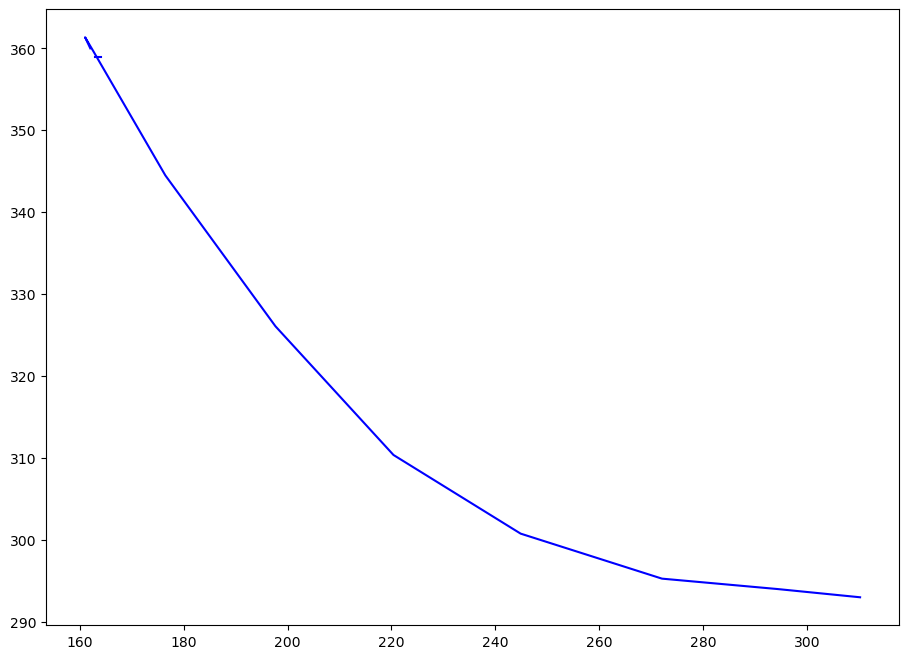

In [4]:
fileName = 'N018_7_1_webFish.json' #put the file name here
step = 0.1 #put the time step here

strokes = extractStrokes(fileName)
plt.figure(figsize=(11, 8))
#print(strokes)
#print(len(strokes))
time = np.arange(0,1,step)
path = []
for points in strokes:
    points = np.array(points)
    for t in time:
        #print(bezierPoint(t, points))
        path.append(bezierPoint(t, points))
    path = np.array(path)
    px, py = path[:,0], path[:,1]
    plt.plot(px, py, 'b-')
    path = []

plt.show()